# SST-2

In [41]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [42]:
import sys
sys.executable

'/home/tonia/anaconda3/envs/fastaiv1/bin/python'

In [43]:
from fastai import *
from fastai.text import *

## Preprocess Data

create LM and Class databunch <br/>
remove neutral label <br/>
see [pytorch-nlp doc](https://pytorchnlp.readthedocs.io/en/latest/source/torchnlp.datasets.html)

In [44]:
from torchnlp.datasets import smt_dataset

In [48]:
bs = 32
path = 'data/sst'

In [49]:
train, dev, test = smt_dataset('data_stm/', train=True, dev=True, test=True)

In [55]:
def load_data_bunch(path, d_sets, neutral=False, vocab=None, save_name='tmp_tdb'):
    dfs = {}
    labels = ['train_df', 'valid_df', 'test_df']
    for label, ds in zip(labels, d_sets):
        df = pd.DataFrame(list(ds))
        if not neutral: 
            df = df[df['label']!='neutral']
        dfs[label] = df
        
    data = TextDataBunch.from_df(path, **dfs, vocab=vocab)
    data.save(save_name)

In [56]:
lm_save = 'tmp_lm'
load_data_bunch(path, [train, dev, test], neutral=True, save_name=lm_save)

In [57]:
data_lm = TextLMDataBunch.load(path, lm_save, bs=bs)

In [58]:
data_lm.show_batch()

idx,text
0,"so huge that a xxunk of words can not adequately describe co - writer \ / director xxmaj peter xxmaj jackson 's xxunk vision of xxup xxunk xxmaj xxunk 's xxmaj middle - earth . xxbos xxmaj singer \ / xxunk xxmaj xxunk xxmaj adams xxunk a xxunk of songs -- a few potential hits , a few more simply xxunk to the story -- but the whole package certainly"
1,"doing nothing but xxunk to it - feeling a part of its grand locations , thinking xxunk as the protagonists xxunk , feeling at the xxunk of its inventiveness , xxunk at its visual delights . xxbos xxmaj probably the best case for xxmaj xxunk since xxmaj xxunk and xxmaj lewis . xxbos a gently funny , sweetly adventurous film that makes you feel genuinely good , that is to"
2,"and gently tedious in its comedy , xxmaj secret xxmaj ballot is a xxunk xxunk movie -- which may be why it 's so successful at xxunk itself in the brain . xxbos a witty , trenchant , wildly unsentimental but flawed look at the xxunk and outs of modern moviemaking . xxbos xxmaj for most of the distance the picture provides a satisfyingly unsettling ride into the dark places"
3,"the absurdities and xxunk is part of the fun . xxbos xxmaj but the talented cast alone will keep you watching , as will the fight scenes . xxbos xxmaj xxunk paints a picture of lives lived in a state of quiet desperation . xxbos xxmaj drug abuse , infidelity and death are n't usually comedy fare , but xxmaj xxunk 's film allows us to chuckle through the angst"
4,"that deserves recommendation . xxbos xxup -lrb- a xxup -rrb- xxunk powerful and astonishingly vivid xxmaj holocaust drama . xxbos a solid cast , assured direction and complete lack of modern day irony . xxbos xxmaj these characters are so well established that the gang feels comfortable with taking insane xxunk and doing the xxunk stuff out of left field , and i ' m all for that . xxbos"


In [70]:
cl_save = 'tmp_cl'
load_data_bunch(path, [train, dev, test], save_name=cl_save, vocab=data_lm.vocab)
data_cl = TextClasDataBunch.load(path, cl_save, bs=bs)

In [71]:
data_cl.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more xxunk engaged in the shameless self - xxunk of ` xxmaj analyze xxmaj this ' xxup -lrb- xxunk xxup -rrb- and ` xxmaj analyze xxmaj that , ' xxunk xxup -lrb- or xxunk xxup -rrb- for later this year .",positive
"xxbos xxmaj there are n't too many films that can be as simultaneously funny , offbeat and heartwarming xxup -lrb- without a thick xxunk of the xxunk , at least xxup -rrb- , but `` xxmaj elling '' manages to do all three quite well , making it one of the year 's most enjoyable xxunk .",positive
"xxbos xxmaj never having seen the first two films in the series , i ca n't compare xxmaj friday xxmaj after xxmaj next to them , but nothing would change the fact that what we have here is a load of xxunk left in the xxunk sun for a good three days .",negative
"xxbos xxmaj the film was produced by xxmaj jerry xxmaj bruckheimer and directed by xxmaj joel xxmaj schumacher , and reflects the worst of their shallow styles : wildly xxunk , xxunk motivated every step of the way and xxunk targeted to please every one xxup -lrb- and no one xxup -rrb- .",negative
"xxbos xxmaj the pain , loneliness and xxunk of the screenwriting process are vividly and painfully brought to xxunk life in this self - deprecating , biting and witty feature written by xxmaj charlie xxmaj kaufman and his xxunk brother , xxmaj xxunk , and directed by xxmaj spike xxmaj xxunk .",positive


# Language Model

load language model and pretrain it

In [72]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [73]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


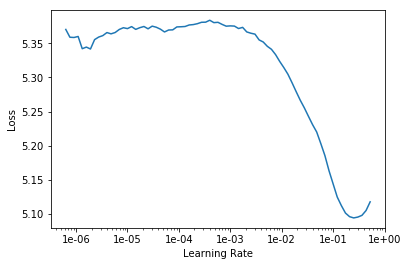

In [77]:
learn.recorder.plot(skip_end=15)

In [83]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 

In [82]:
learn.save('fit_head')

AttributeError: 'RNNLearner' object has no attribute 'opt'

In [ ]:
xxx

In [ ]:
learn.load('fit_head');

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [ ]:
learn.save('fine_tuned')

In [80]:
learn.load('fine_tuned');

FileNotFoundError: [Errno 2] No such file or directory: 'data/sst/models/fine_tuned.pth'

test model 

In [ ]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

some expl.

In [ ]:
learn.save_encoder('fine_tuned_enc')

## Classifier

In [81]:
learn = text_classifier_learner(data_cl, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

FileNotFoundError: [Errno 2] No such file or directory: 'data/sst/models/fine_tuned_enc.pth'

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [ ]:
learn.save('first')

In [ ]:
learn.load('first');

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [ ]:
learn.save('second')

In [ ]:
learn.load('second');

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [ ]:
learn.save('third')

In [ ]:
learn.load('third');

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

In [ ]:
learn.predict("I really loved that movie, it was awesome!")